In [1]:
%matplotlib inline
from eden_wrapper import EdenWrapper

In [2]:
train = [
    ('ce1cg', 
     'TAATGTTTGTGCTGGTTTTTGTGGCATCGGGCGAGAATAGCGCGTGGTGTGAAAGACTGTTTTTTTGATCGTTTTCACAAAAATGGAAGTCCACAGTCTTGACAG'),
    ('ara', 
     'GACAAAAACGCGTAACAAAAGTGTCTATAATCACGGCAGAAAAGTCCACATTGATTATTTGCACGGCGTCACACTTTGCTATGCCATAGCATTTTTATCCATAAG'),
    ('bglr1', 
     'ACAAATCCCAATAACTTAATTATTGGGATTTGTTATATATAACTTTATAAATTCCTAAAATTACACAAAGTTAATAACTGTGAGCATGGTCATATTTTTATCAAT'),
    ('crp', 
     'CACAAAGCGAAAGCTATGCTAAAACAGTCAGGATGCTACAGTAATACATTGATGTACTGCATGTATGCAAAGGACGTCACATTACCGTGCAGTACAGTTGATAGC'),
    ('cya', 
     'ACGGTGCTACACTTGTATGTAGCGCATCTTTCTTTACGGTCAATCAGCAAGGTGTTAAATTGATCACGTTTTAGACCATTTTTTCGTCGTGAAACTAAAAAAACC'),
    ('deop2', 
     'AGTGAATTATTTGAACCAGATCGCATTACAGTGATGCAAACTTGTAAGTAGATTTCCTTAATTGTGATGTGTATCGAAGTGTGTTGCGGAGTAGATGTTAGAATA'),
    ('gale', 
     'GCGCATAAAAAACGGCTAAATTCTTGTGTAAACGATTCCACTAATTTATTCCATGTCACACTTTTCGCATCTTTGTTATGCTATGGTTATTTCATACCATAAGCC'),
    ('ilv', 
     'GCTCCGGCGGGGTTTTTTGTTATCTGCAATTCAGTACAAAACGTGATCAACCCCTCAATTTTCCCTTTGCTGAAAAATTTTCCATTGTCTCCCCTGTAAAGCTGT'),
    ('lac', 
     'AACGCAATTAATGTGAGTTAGCTCACTCATTAGGCACCCCAGGCTTTACACTTTATGCTTCCGGCTCGTATGTTGTGTGGAATTGTGAGCGGATAACAATTTCAC'),
    ('male', 
     'ACATTACCGCCAATTCTGTAACAGAGATCACACAAAGCGACGGTGGGGCGTAGGGGCAAGGAGGATGGAAAGAGGTTGCCGTATAAAGAAACTAGAGTCCGTTTA'),
    ('malk', 
     'GGAGGAGGCGGGAGGATGAGAACACGGCTTCTGTGAACTAAACCGAGGTCATGTAAGGAATTTCGTGATGTTGCTTGCAAAAATCGTGGCGATTTTATGTGCGCA'),
    ('malt', 
     'GATCAGCGTCGTTTTAGGTGAGTTGTTAATAAAGATTTGGAATTGTGACACAGTGCAAATTCAGACACATAAAAAAACGTCATCGCTTGCATTAGAAAGGTTTCT'),
    ('ompa', 
     'GCTGACAAAAAAGATTAAACATACCTTATACAAGACTTTTTTTTCATATGCCTGACGGAGTTCACACTTGTAAGTTTTCAACTACGTTGTAGACTTTACATCGCC'),
    ('tnaa', 
     'TTTTTTAAACATTAAAATTCTTACGTAATTTATAATCTTTAAAAAAAGCATTTAATATTGCTCCCCGAACGATTGTGATTCGATTCACATTTAAACAATTTCAGA'),
    ('uxu1', 
     'CCCATGAGAGTGAAATTGTTGTGATGTGGTTAACCCAATTAGAATTCGGGATTGACATGTCTTACCAAAAGGTAGAACTTATACGCCATCTCATCCGATGCAAGC'),
    ('pbr322', 
     'CTGGCTTAACTATGCGGCATCAGAGCAGATTGTACTGAGAGTGCACCATATGCGGTGTGAAATACCGCACAGATGCGTAAGGAGAAAATACCGCATCAGGCGCTC'),
    ('trn9cat', 
     'CTGTGACGGAAGATCACTTCGCAGAATAAATAAATCCTGGTGTCCCTGTTGATACCGGGAAGCCCTGGGCCAACTTTTGGCGAAAATGAGACGTTGATCGGCACG'),
    ('tdc', 
     'GATTTTTATACTTTAACTTGTTGATATTTAAAGGTATTTAATTGTAATAACGATACTCTGGAAAGTATTGAAAGTTAATTTGTGAGTGGTCGCACATATCCTGTT'),
    ]

# test data consists of first 9 sequences of training data
test = train[:9]

In [4]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

ew = EdenWrapper(alphabet='dna',
                # distance=10, 
                # radius=5, 
                clustering_algorithm=km,
                threshold=0,
                wl_resolution = 200)
ew.fit(seqs=train)

In [4]:
for i in ew.original_motives_list:
    for j in i:
        print j
    print

(1, 'TGCGGTGTGA')
(1, 'CGTGATGTT')
(1, 'TGTTGTGTG')

(1, 'CACACAAAGC')
(1, 'GCATAAAAAA')
(1, 'AAAGAGGTTG')

(1, 'TTTACACTTT')
(1, 'TCACACTTTT')



In [5]:
print ew.score_mm(motif_num=1, seq='CACACAAAGC' * 4, zero_padding=True)

[-230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, 0, 0, 0, 0, 0, 0, 0, 0]


In [6]:
for i in ew.aligned_motives_list:
    for j in i:
        print j
    print 

(1, 'TGCGGTGTGA')
(1, 'CGTGATGTT-')
(1, 'TGTTGTGTG-')

(1, '-CACACAAAGC---')
(1, 'GCATAAAAAA----')
(1, '----AAAGAGGTTG')

(1, 'TTTACACTTT-')
(1, '-TCACACTTTT')



In [7]:
for i in ew.motives_list:
    for j in i:
        print j
    print

(1, 'TGCGGTGTG')
(1, 'CGTGATGTT')
(1, 'TGTTGTGTG')

(1, 'CACACAAAGC')
(1, 'CATAAAAAAG')
(1, 'C-TAAAGAGG')

(1, 'TTACACTTT')
(1, 'TCACACTTT')



In [8]:
predictions = ew.predict(input_seqs=test, return_list=True)
for p in predictions: print p

[0]
[]
[]
[]
[]
[]
[]
[]
[]


In [9]:
predictions = ew.predict(input_seqs=test, return_list=False)
for p in predictions: print p

1
0
0
0
0
0
0
0
0


In [10]:
match = ew.transform(input_seqs=test, return_match=True)
for m in match: print m

[[(43, 53, 0.021947873799725647)], [], []]
[[], [], []]
[[], [], []]
[[], [], []]
[[], [], []]
[[], [], []]
[[], [], []]
[[], [], []]
[[], [], []]


In [11]:
match = ew.transform(input_seqs=test, return_match=False)
for m in match: print m

[1, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]


In [12]:
ew2= EdenWrapper(alphabet='dna',
                   # distance=10, 
                   # radius=5, 
                   clustering_algorithm=km)
predictions = ew2.fit_predict(seqs=train)
for p in predictions: print p

1
1
0
0
0
0
2
0
0
1
0
0
0
0
0
1
0
0


In [13]:
matches = ew2.fit_transform(seqs=train)
for m in matches: print m

[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 1, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[0, 0, 1]
[0, 0, 0]
[0, 0, 0]
[1, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]


In [14]:
#printing motives as lists
for motif in ew.motives_list:
    for m in motif:
        print m
    print

(1, 'TGCGGTGTG')
(1, 'CGTGATGTT')
(1, 'TGTTGTGTG')

(1, 'CACACAAAGC')
(1, 'CATAAAAAAG')
(1, 'C-TAAAGAGG')

(1, 'TTACACTTT')
(1, 'TCACACTTT')



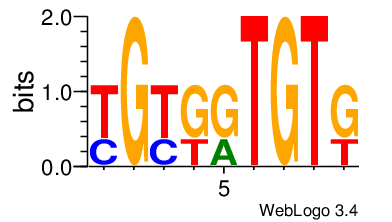

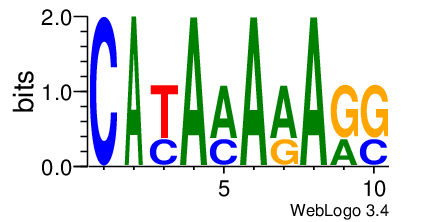

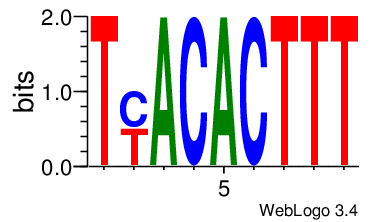

In [15]:
ew.display_logo(do_alignment=False)

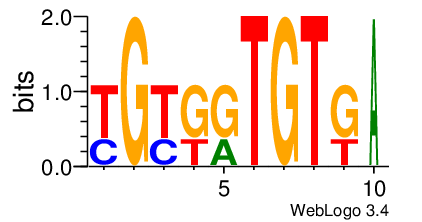

In [16]:
ew.display_logo(motif_num=1)

In [17]:
ew.align_motives()    #MSA with Muscle
motives1=ew.aligned_motives_list
for m in motives1:
    for i in m:
        print i
    print

(1, 'TGCGGTGTG')
(1, 'CGTGATGTT')
(1, 'TGTTGTGTG')

(1, 'CACACAAAGC')
(1, 'CATAAAAAAG')
(1, 'C-TAAAGAGG')

(1, 'TTACACTTT')
(1, 'TCACACTTT')



In [18]:
from utilities import MotifWrapper
pwm1 = MotifWrapper(alphabet='dna', pseudocounts=0)

motives=ew.motives_list
pwm1.fit(motives)

In [19]:
ew.display()

        0      1      2      3      4      5      6      7      8      9
-:   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.67
A:   0.00   0.00   0.00   0.00   0.33   0.00   0.00   0.00   0.00   0.33
C:   0.33   0.00   0.33   0.00   0.00   0.00   0.00   0.00   0.00   0.00
G:   0.00   1.00   0.00   0.67   0.67   0.00   1.00   0.00   0.67   0.00
T:   0.67   0.00   0.67   0.33   0.00   1.00   0.00   1.00   0.33   0.00

        0      1      2      3      4      5      6      7      8      9     10     11     12     13
-:   0.67   0.33   0.33   0.33   0.00   0.00   0.00   0.00   0.00   0.00   0.33   0.67   0.67   0.67
A:   0.00   0.00   0.67   0.00   1.00   0.67   1.00   0.67   1.00   0.33   0.00   0.00   0.00   0.00
C:   0.00   0.67   0.00   0.33   0.00   0.33   0.00   0.00   0.00   0.00   0.33   0.00   0.00   0.00
G:   0.33   0.00   0.00   0.00   0.00   0.00   0.00   0.33   0.00   0.67   0.33   0.00   0.00   0.33
T:   0.00   0.00   0.00   0.33   0.00   0.00   0.00   0.

In [20]:
ew.display(motif_num=3)

        0      1      2      3      4      5      6      7      8      9     10
-:   0.50   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.50
A:   0.00   0.00   0.00   1.00   0.00   1.00   0.00   0.00   0.00   0.00   0.00
C:   0.00   0.00   0.50   0.00   1.00   0.00   1.00   0.00   0.00   0.00   0.00
G:   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
T:   0.50   1.00   0.50   0.00   0.00   0.00   0.00   1.00   1.00   1.00   0.50



In [22]:
# Score a test sequence using probability score
test_seq = 'AAAAAAAAAAAA' * 10
seq_score = ew.score_pwm(motif_num=2, seq=test_seq)
print seq_score

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [23]:
%%time
# Score a test sequence using Hidden Markov Model score
mm_score = ew.score_mm(motif_num=1, seq=test_seq)
print 'Motif instances used for scoring:'
for m in ew.original_motives_list[0]:
    print m[1]
print
print 'Score:'
print mm_score

Motif instances used for scoring:
TGCGGTGTGA
CGTGATGTT
TGTTGTGTG

Score:
[-230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -230.25850929940458, -2

In [4]:
from eden.motif import SequenceMotif

In [5]:
help (SequenceMotif)

Help on class SequenceMotif in module eden.motif:

class SequenceMotif(__builtin__.object)
 |  Methods defined here:
 |  
 |  __init__(self, min_subarray_size=7, max_subarray_size=10, min_motif_count=1, min_cluster_size=1, training_size=None, negative_ratio=2, shuffle_order=2, n_iter_search=1, complexity=4, nbits=20, clustering_algorithm=None, n_jobs=4, n_blocks=8, block_size=None, pre_processor_n_jobs=4, pre_processor_n_blocks=8, pre_processor_block_size=None, random_state=1)
 |  
 |  fit(self, seqs, neg_seqs=None)
 |      Builds a discriminative estimator.
 |      Identifies the maximal subarrays in the data.
 |      Clusters them with the clustering algorithm provided in the initialization phase.
 |      For each cluster builds a fast sequence search model (Aho Corasick data structure).
 |  
 |  fit_predict(self, seqs, return_list=False)
 |  
 |  fit_transform(self, seqs, return_match=False)
 |  
 |  info(self)
 |  
 |  load(self, obj)
 |  
 |  predict(self, seqs, return_list=False)